# 產生各種波形，並視覺化

In [2]:
import numpy as np
import matplotlib.pyplot as plt

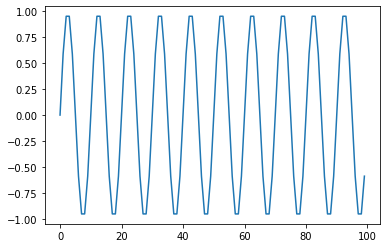

In [111]:
#產生10Hz的訊號
num_samples = 100
#time = np.linspace(0,1,1000, endpoint=False)
time = np.arange(num_samples)
frequency = 10
sinwave = np.sin(2 * np.pi / frequency * time)
plt.plot(time,sinwave)
plt.show()

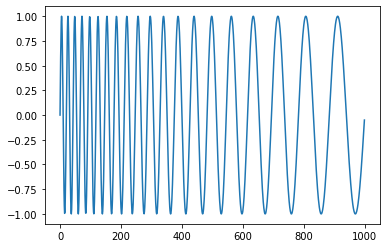

In [124]:
#產生20Hz -100Hz的Chirp訊號

num_samples = 1000
#time = np.linspace(0,1,n, endpoint=True)
time = np.arange(num_samples)
fmin = 20
fmax = 50
#frequency = np.linspace(0, num_samples, num_samples ,endpoint=True) * ((fmax - fmin)/ num_samples ) + fmin
frequency = np.arange(num_samples) *  ((fmax - fmin)/ num_samples) + fmin
sinwave = np.sin(2 * np.pi / frequency * time)
plt.plot(time, sinwave)
plt.show()

In [25]:
np.linspace(0,100,100,endpoint=False)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

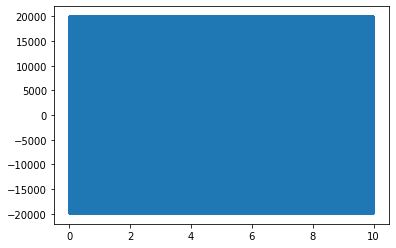

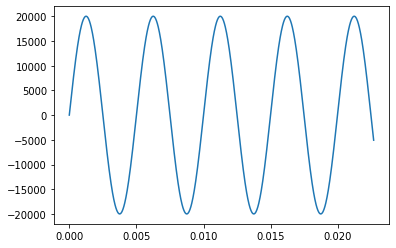

In [68]:
import wave
import struct

amplitude = 20000            #振幅
duration  = 10                #時間長度(秒)
fs = 44100                   #取樣頻率 
num_samples = duration * fs  #樣本數
num_channels = 1             #通道
sample_width = 2             #樣本寬度
num_frames = num_samples     #音框數 = 樣本數
comptype = 'NONE'            #壓縮型態
compname = 'not compressed'

time = np.linspace(0, duration ,num_samples, endpoint=True)

#====產生chirp訊號=====
fmin = 200
fmax = 400
frequency = np.linspace(0, num_samples, num_samples ,endpoint=True) * ((fmax - fmin)/num_samples) + fmin
x = amplitude * np.sin(2 * np.pi * frequency * time)

plt.plot(time, x)
plt.show()

plt.plot(time[:1000], x[:1000])
plt.show()

filename = 'chirp.wav'       #指定檔案名稱
wavefile =  wave.open(filename,'w')
wavefile.setparams((num_channels, sample_width, fs, num_frames ,comptype,compname))

#寫入wave檔須將每個樣本(或音框)的浮點數轉為整數，再使用struct的pack轉換成2個位元組(byte)或16位元(bits)的整數儲存(即'h'的格式定義)
for s in x:
    wavefile.writeframes( struct.pack('h',int(s)))

wavefile.close()

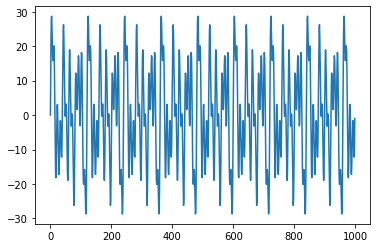

In [175]:
#產生10Hz 20Hz 30Hz 40Hz的混合訊號

num_samples = 1000
amplitude = 10
#time = np.linspace(0,1,num_samples, endpoint=False)
time = np.arange(num_samples)
newwave = np.zeros(num_samples)
for freq in range(1,5):
    wave_part = amplitude * np.sin(2 * np.pi / (freq*10) * time)
    newwave += wave_part
plt.plot(time , newwave)
plt.show()

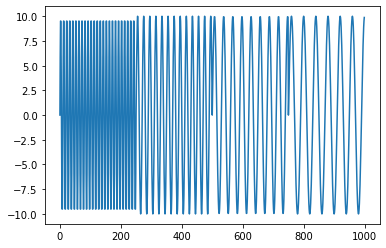

In [131]:
#產生10Hz 20Hz 30Hz 40Hz的分段訊號

freq_list = [10,20,30,40]
num_samples = 1000
amplitude = 10

time = np.arange(num_samples)
time_part = np.arange(num_samples/4)

#time_part = np.linspace(0,1,num_samples/4, endpoint=False)

sinwave = []
sinwave = np.array(sinwave)

for freq in freq_list:
    sinwave_part = amplitude * np.sin(2 * np.pi /freq * time_part)
    sinwave = np.append(sinwave,sinwave_part)
plt.plot(time,sinwave)
plt.show()

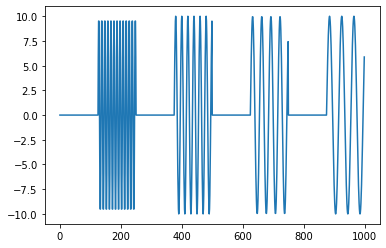

In [173]:
#在分段訊號之中加pause

freq_list = [10,20,30,40]

num_samples = 1000
amplitude = 10
part_length = int( num_samples/(2*len(freq_list)) )
time = np.arange( num_samples)
time_part = np.arange( part_length )


newwave = []
newwave = np.array(newwave)

for freq in freq_list:
    pause_part = np.zeros( part_length )
    wave_part = amplitude * np.sin(2 * np.pi / freq * time_part)
    newwave = np.append(newwave , pause_part)
    newwave = np.append(newwave , wave_part)
plt.plot(time, newwave)
plt.show()

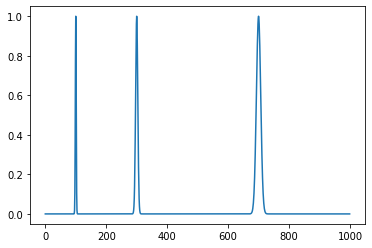

In [140]:
# 製作 gaussian bumps
"""
用不同的sigma製作gaussian峰
2∗σ1=2 
2∗σ2=10 
2∗σ3=20 
"""
num_samples = 1000
time = np.arange(num_samples)

s1 = 2
s2 = 5
s3 = 10

events_time = num_samples * np.array([0.1, 0.3, 0.7])

bumps = np.exp(-( (time-events_time[0]) / s1 )**2 ) + \
        np.exp(-( (time-events_time[1]) / s2 )**2 ) + \
        np.exp(-( (time-events_time[2]) / s3 )**2 ) 

plt.plot(bumps)
plt.show()

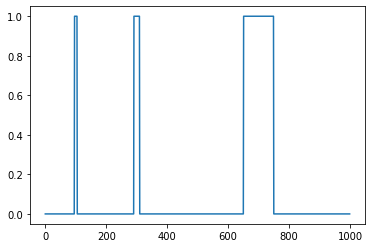

In [144]:
#繪製step

num_samples = 1000
time = np.arange(num_samples)


w1 = 5
w2 = 10
w3 = 50

events_time = num_samples * np.array([0.1, 0.3, 0.7])

steps = ((time > events_time[0]-w1) & (time < events_time[0]+w1)) + \
        ((time > events_time[1]-w2) & (time < events_time[1]+w2)) + \
        ((time > events_time[2]-w3) & (time < events_time[2]+w3))

plt.plot(steps)
plt.show()

SNR: 100.0
SNR in db: 20.0


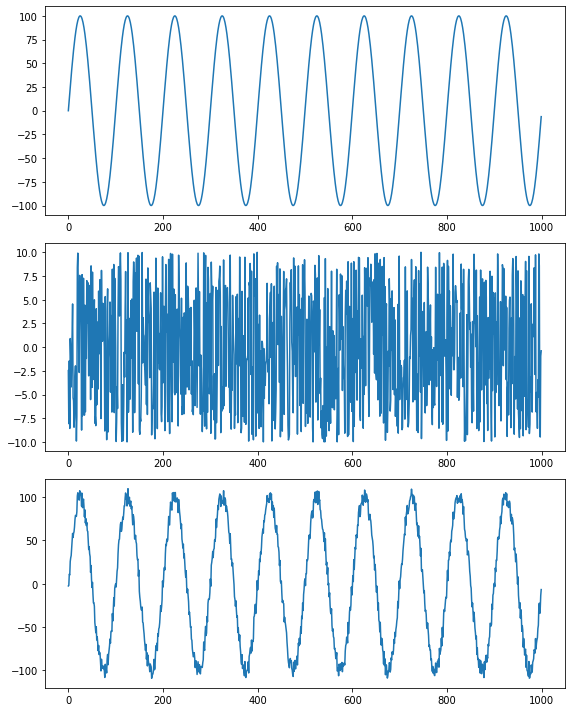

In [157]:
#在sin波加一些雜訊

#產生訊號
num_samples = 1000
time = np.arange(num_samples)

amplitude = 100
frequency = 100
sinwave = amplitude * np.sin(2 * np.pi / frequency * time)

noise_amplitude = 10
noise = np.random.uniform(-noise_amplitude, noise_amplitude, num_samples)
newwave = sinwave + noise

snr = (amplitude /noise_amplitude)**2
snr_db = 10 * np.log10(snr)
print('SNR:',snr)
print('SNR in db:', snr_db)

fig, axes = plt.subplots(3, 1, figsize=(8,10))
axes[0].plot(time,sinwave)
axes[1].plot(time,noise)
axes[2].plot(time,newwave)

fig.tight_layout()
plt.show()

# 進行頻譜分析和小波分析

In [161]:
from numpy.fft import fft, fftshift, fftfreq

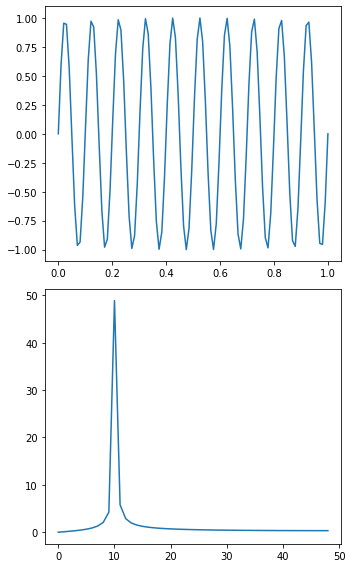

In [300]:

duration  = 1                #時間長度(秒)
fs = 100                     #取樣頻率 
num_samples = duration * fs  #樣本數
frequency = 10               #產生10Hz的訊號

time = np.linspace(0, duration ,num_samples, endpoint=True)
sig = np.sin(2 * np.pi * frequency * time)


#進行頻譜分析
f_values = fftshift(fftfreq( num_samples, 1/fs))
x = fftshift( fft(sig) )
fft_values = abs(x)
f_values = f_values[ int(num_samples/2) :-1]
fft_values = fft_values[ int(num_samples/2) :-1]

fig, axes = plt.subplots(2, 1, figsize=(5,8))
axes[0].plot(time , sig)
axes[1].plot(f_values , fft_values)
fig.tight_layout()

plt.show()


In [262]:
#繪製小波分析圖
import pywt

def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor1.5-1.0', 
                 cmap = plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    return yticks, ylim

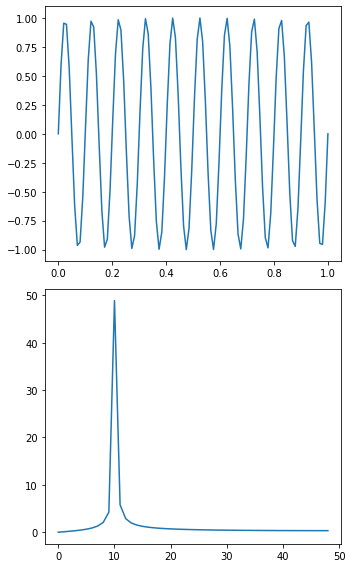

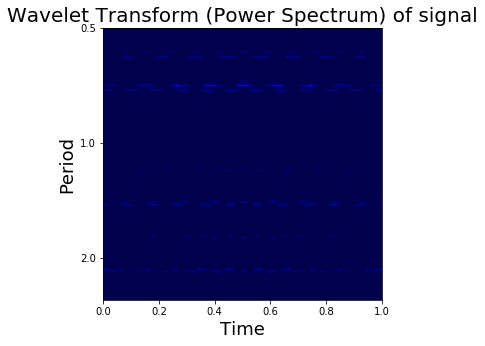

In [299]:
#繪製小波分析圖

duration  = 1                #時間長度(秒)
fs = 100                     #取樣頻率 
num_samples = duration * fs  #樣本數
frequency = 10               #產生10Hz的訊號

time = np.linspace(0, duration ,num_samples, endpoint=True)
sig = np.sin(2 * np.pi * frequency * time)


#進行頻譜分析
f_values = fftshift(fftfreq( num_samples, 1/fs))
x = fftshift( fft(sig) )
fft_values = abs(x)
f_values = f_values[ int(num_samples/2) :-1]
fft_values = fft_values[ int(num_samples/2) :-1]

#繪圖
fig, axes = plt.subplots(2, 1, figsize=(5,8))
axes[0].plot(time , sig)
axes[1].plot(f_values , fft_values)
fig.tight_layout()

plt.show()


scales = np.arange(1, 256)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period'
xlabel = 'Time'

fig, ax = plt.subplots(figsize=(5, 5))
plot_wavelet(ax, time, sig, scales, xlabel=xlabel, ylabel=ylabel, title=title)
plt.show()

In [241]:
import scaleogram as scg 
scg.set_default_wavelet('cmor1-1.5')

# Try these ones to see various compromises between scales and time resolution 
#scg.set_default_wavelet('cgau5')
#scg.set_default_wavelet('cgau1')
#scg.set_default_wavelet('shan0.5-2')
#scg.set_default_wavelet('mexh')

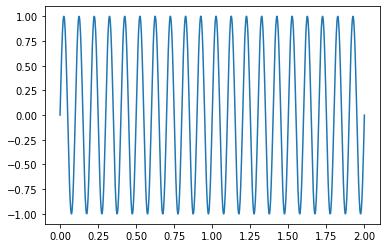

wavelet : cmor1-1.5 ( Complex Morlet wavelets )


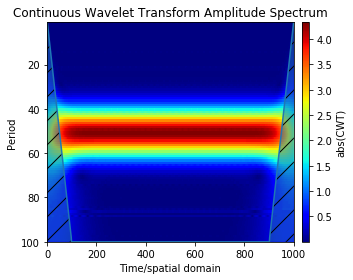

In [274]:

duration  = 2                #時間長度(秒)

fs = 500                     #取樣頻率  (每秒採樣多少點)
num_samples = duration * fs  #樣本數
frequency = 10               #產生10Hz的訊號

time = np.linspace(0, duration ,num_samples, endpoint=True)
signal = np.sin(2 * np.pi * frequency * time)


scales = scg.periods2scales( np.arange(1, 100) )

#繪圖
plt.plot(time , signal)
plt.show()

# Scaleogram
ax2 = scg.cws(signal, scales=scales,  figsize=(5,4)) 
#txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("wavelet :", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

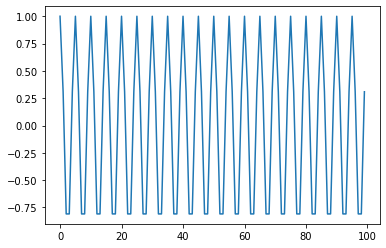

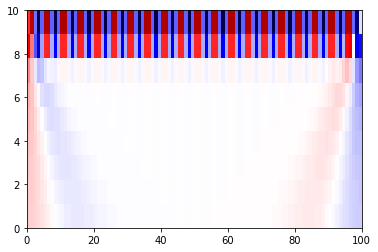

In [298]:
from scipy import signal
import matplotlib.pyplot as plt

time = np.arange(100)
sig  = np.cos(2 * np.pi / 5 * time) 
#繪圖
plt.plot(time , sig)
plt.show()

widths = np.arange(1, 10)

cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[0, len(time),0 , 10],
           cmap= plt.cm.seismic, 
           aspect='auto',
           vmax=abs(cwtmatr).max(), 
           vmin=-abs(cwtmatr).max()
          )
plt.show()

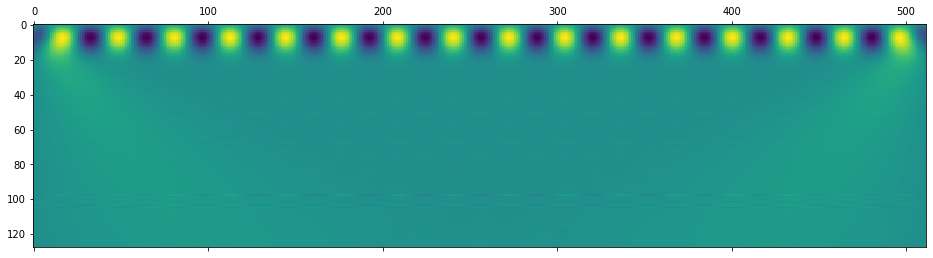

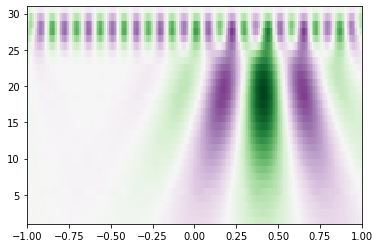

In [301]:
# https://pywavelets.readthedocs.io/en/latest/ref/cwt.html
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(coef)                  # doctest: +SKIP
plt.show()                         # doctest: +SKIP

import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
plt.show()                            # doctest: +SKIP